In [16]:
import pandas as pd


In [17]:
train_data = pd.read_csv('credit.data/creditdefault_train.csv')
test_data = pd.read_csv('credit.data/creditdefault_test.csv')


In [18]:
train_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [19]:
test_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,150000,1,1,2,35,-1,-1,-1,-1,...,-3,780,0,0,9054,0,783,0,0,0
14996,0,140000,1,2,1,41,0,0,0,0,...,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000
14997,0,10000,1,3,1,43,0,0,0,-2,...,0,0,0,0,2000,0,0,0,0,0
14998,1,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000


In [20]:
y_train = train_data['Y'].values
X_train = train_data.drop(['Y'],axis=1).values

y_test = test_data['Y'].values
X_test = test_data.drop(['Y'],axis=1).values

In [21]:
X_train[0]

array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0], dtype=int64)

In [23]:
import matplotlib as plt
%matplotlib inline

counts = [list(y_train).count(0), list(y_train).count(1)]
counts

[11682, 3318]

## Scaling the data

In [22]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [23]:
X_train[0]

array([-1.13331216,  0.8082431 ,  0.19067968, -1.06403915, -1.24187957,
        1.79595421,  1.77813178, -0.69601185, -0.66540266, -1.51753654,
       -1.48040468, -0.64832639, -0.64983325, -0.6711257 , -0.67292975,
       -0.66565359, -0.65374752, -0.36112736, -0.23812634, -0.36269067,
       -0.30289045, -0.31031133, -0.28876454])

## K-Nearest Neighbour (Gosia)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(metric = 'minkowski')

'''
k-Nearest Neighbours Classifier. 
parameters: 
- n_neigbours = number of neigbours to use by default for kneighbors queries.
- p = pinteger: (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 
and euclidean_distance (l2) for p = 2.
'''
parameters = {
    'n_neighbors':[2,5,7,9,11,15,20,25,30,50],
    'p':[1,2]
}


'''
GridSearchCv searches over specified parameter values for an estimator.

cv - Number of folds to use in cross-validation
n_jobs - the number of jobs to run in parallel. -1 means using all processors (should run faster) 
'''
grid = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_knn_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8094666666666667 , best parameters :  {'n_neighbors': 25, 'p': 2}


In [12]:
params = scores['params']
mean_scores = scores['mean_test_score']

# create a dictionary for mean accuracy values (validation)
l1, l2 = { 'means' : [] }, { 'means' : []}

#split mean scores depending on the power parameter for the minkowski metric. 
for i in range(len(mean_scores)):
    if (params[i]['p'] == 1):
        l1['means'].append(mean_scores[i])
    else:
        l2['means'].append(mean_scores[i])   

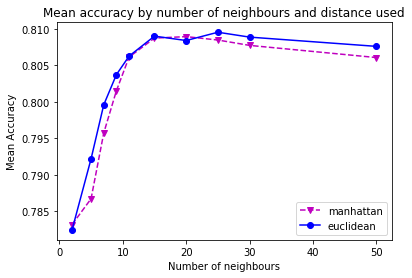

In [13]:
import matplotlib.pyplot as plt

# plot mean scores by the number of neighbours and distance algorithm used
plt.plot([x for x in parameters['n_neighbors']], l1['means'], 'mv--')
plt.plot([x for x in parameters['n_neighbors']], l2['means'],'bo-')
plt.title('Mean accuracy by number of neighbours and distance used')
plt.legend(['manhattan', 'euclidean'])
plt.xlabel('Number of neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

In [14]:
# predictions on test set
predY = best_knn_model.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.813


In [16]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11159,   523],
       [ 2289,  1029]], dtype=int64)

In [17]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.310126582278481

In [18]:
# precision
prec=tp/(tp+fp)
prec

0.6630154639175257

In [19]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.4225872689938398

## Decision Tree (Gosia)

In [20]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()

'''
parameters:
- max_depth - maximum depth of the tree.
- critetion - function that measures the quality of the split. gini = Gini purity, entropy = information gain.
- max_features - number of features to consider when looking for the best split
'''
parameters = {
    'max_depth':range(2,20), 
    'criterion':['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_tree_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8151999999999999 , best parameters :  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}


In [21]:
gini_sqrt = {
    'means' : []   
}

gini_log2 = {
    'means' : []
}

entropy_sqrt = {
    'means' : []
}

entropy_log2 = {
    'means' : []
}

In [22]:
mean_accuracies = scores['mean_test_score']
params = scores['params']

for i in range(len(mean_accuracies)):
    if (params[i]['criterion'] == 'gini' and params[i]['max_features'] == 'sqrt'):
        gini_sqrt['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'gini' and params[i]['max_features'] == 'log2'):
        gini_log2['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'entropy' and params[i]['max_features'] == 'sqrt'):
        entropy_sqrt['means'].append(mean_accuracies[i])
    if (params[i]['criterion'] == 'entropy' and params[i]['max_features'] == 'log2'):
        entropy_log2['means'].append(mean_accuracies[i])

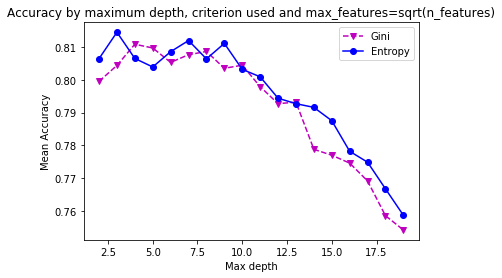

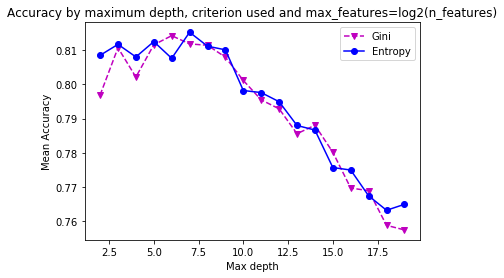

In [23]:
import matplotlib.pyplot as plt


plt.plot([x for x in parameters['max_depth']], gini_sqrt['means'], 'mv--')
plt.plot([x for x in parameters['max_depth']], entropy_sqrt['means'],'bo-')
plt.title('Accuracy by maximum depth, criterion used and max_features=sqrt(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

plt.plot([x for x in parameters['max_depth']], gini_log2['means'], 'mv--')
plt.plot([x for x in parameters['max_depth']], entropy_log2['means'],'bo-')
plt.title('Accuracy by maximum depth, criterion used and max_features=log2(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

In [24]:
predY = best_tree_model.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [25]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.812


In [26]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[10980,   702],
       [ 2118,  1200]], dtype=int64)

In [27]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
print(recall)


# checking if it's correctly calculated
from sklearn.metrics import recall_score
recall_score(y_test, predY)

0.3616636528028933


0.3616636528028933

In [28]:
# precision
prec=tp/(tp+fp)
print(prec)

from sklearn.metrics import precision_score
precision_score(y_test, predY)

0.6309148264984227


0.6309148264984227

In [29]:
# f1 
f1= 2*prec*recall / (prec+recall)
print(f1)

from sklearn.metrics import f1_score
f1_score(y_test, predY)

0.4597701149425288


0.4597701149425288

## Random Forest (Katie)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, criterion='gini', bootstrap=True)

parameters = {
    'n_estimators': [500,700,900],
    'max_features': range(10,15), 
}

grid = GridSearchCV(estimator=rfc, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'max_features': 11, 'n_estimators': 900}


In [9]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

y = {
    "500" : [],
    "700" : [],
    "900" : []
}
for p,m, in zip(params_combos, mean_accuracies):
    y[str(p['n_estimators'])].append(m)


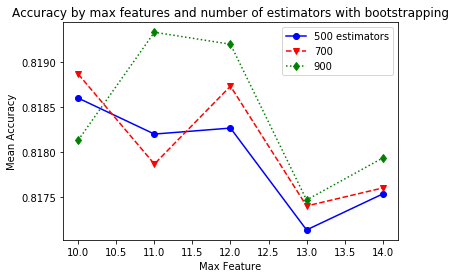

In [10]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['max_features']], [y for y in y['500']], 'bo-')
plt.plot([x for x in parameters['max_features']], [y for y in y['700']], 'rv--')
plt.plot([x for x in parameters['max_features']], [y for y in y['900']], 'gd:')
plt.legend(['500 estimators', '700', '900'])
plt.xlabel('Max Feature')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by max features and number of estimators with bootstrapping")
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score 

best_rfc = grid.best_estimator_

In [12]:
# Predict test values using RFC model with best hyper parameters
predY = best_rfc.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [13]:
# Confusion Matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11115   567]
 [ 2173  1145]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## Bagging (Katie)

In [30]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()

parameters = {
    'n_estimators': [100,300,500,700,900],
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator=bag, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'bootstrap': True, 'n_estimators': 300}


In [31]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

boot = []
no_boot = []
for p,m, in zip(params_combos, mean_accuracies):
    if p['bootstrap'] == True:
        boot.append(m)
    if p['bootstrap'] == False:
        no_boot.append(m)

Text(0.5, 1.0, 'Accuracy by N-estimators')

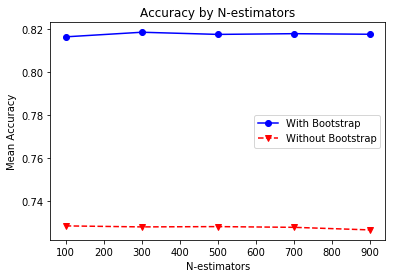

In [32]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['n_estimators']], [x for x in boot], 'bo-')
plt.plot([x for x in parameters['n_estimators']], [x for x in no_boot], 'rv--')
plt.legend(['With Bootstrap', 'Without Bootstrap'])
plt.xlabel('N-estimators')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by N-estimators")
# plt.show()

In [33]:
from sklearn.model_selection import cross_val_score 

best_bag = grid.best_estimator_

In [34]:
# Predict test values using bagging model with best hyper parameters
predY = best_bag.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [35]:
# Confusion Matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11112   570]
 [ 2172  1146]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## Boosting (Katie)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()

parameters = {
    'n_estimators': [100,300,500,700,900],
    'loss': ['deviance', 'exponential']
}

grid = GridSearchCV(estimator=boost, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'loss': 'deviance', 'n_estimators': 100}


In [10]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

deviance = []
exponential = []
for p,m, in zip(params_combos, mean_accuracies):
    if p['loss'] == 'deviance':
        deviance.append(m)
    if p['loss'] == 'exponential':
        exponential.append(m)

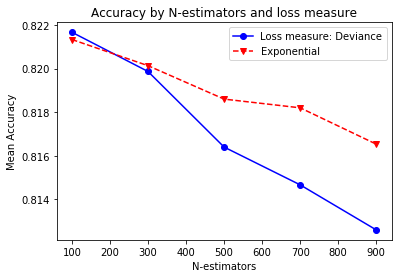

In [12]:
import matplotlib.pyplot as plt

plt.plot([x for x in parameters['n_estimators']], [x for x in deviance], 'bo-')
plt.plot([x for x in parameters['n_estimators']], [x for x in exponential], 'rv--')
plt.legend(['Loss measure: Deviance', 'Exponential'])
plt.xlabel('N-estimators')
plt.ylabel('Mean Accuracy')
plt.title("Accuracy by N-estimators and loss measure")
plt.show()

In [13]:
best_boost = grid.best_estimator_

In [14]:
predY = best_boost.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [15]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predY)

print(CM)
print("accuracy: %.2f" % metrics.accuracy_score(y_test, predY))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test, predY )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

[[11113   569]
 [ 2143  1175]]
accuracy: 0.82
class 0, precision: 0.84, recall: 0.95,  f-score: 0.89
class 1, precision: 0.67, recall: 0.35,  f-score: 0.46


## SVM (Gosia)

In [9]:
## SVM doesn't scale well, i.e. is not suitable large datasets, or noisy datasets too. 
## SVC - the fit time increaes at least quadratically with the number of samples

In [10]:
'''
Tried using PCA to reduce dimensionality (tried 2,4 and 10 components) and to make the algorithm run faster, but 
the accuracy results were lower; seems like it was gettind rid of useful information.
'''
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# pca.fit(X_train)
# X_t_train = pca.transform(X_train)
# X_t_test = pca.transform(X_test)

In [11]:
# X_t_train

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classification
svc = SVC(gamma = 'auto')

'''
- C -  Regularization parameter. The strength of the regularization is inversely proportional to C. 
    Must be strictly positive. The penalty is a squared l2 penalty.
- kernel - kernel type. 
'''

parameters = {
    
    'C' : [0.01,0.04,0.08,0.1,0.2,0.4,0.8,1,2],
    'kernel' : ['sigmoid','rbf']
    
}

grid = GridSearchCV(estimator = svc, param_grid= parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
grid.fit(X=X_train, y=y_train)
scores = grid.cv_results_
best_svm_model = grid.best_estimator_
print ('best accuracy and parameters are', grid.best_score_, grid.best_params_)

best accuracy and parameters are 0.8189333333333334 {'C': 1, 'kernel': 'rbf'}


In [46]:
sigmoid, rbf = { 'means' : [] }, { 'means' : []}

In [47]:
mean_accuracies = scores['mean_test_score']
params = scores['params']

for i in range(len(mean_accuracies)):
    if (params[i]['kernel'] == 'sigmoid'):
        sigmoid['means'].append(mean_accuracies[i])
    if (params[i]['kernel'] == 'rbf'):
        rbf['means'].append(mean_accuracies[i])


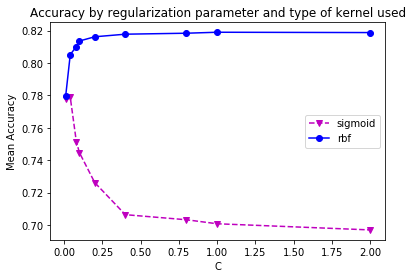

In [48]:
import matplotlib.pyplot as plt


plt.plot([x for x in parameters['C']], sigmoid['means'], 'mv--')
plt.plot([x for x in parameters['C']], rbf['means'],'bo-')
plt.title('Accuracy by regularization parameter and type of kernel used')
plt.legend(['sigmoid', 'rbf'])
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.show()

In [49]:
predY = best_svm_model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.819


In [50]:
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [51]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11212,   470],
       [ 2243,  1075]], dtype=int64)

In [52]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.32399035563592526

In [53]:
# precision
prec=tp/(tp+fp)
prec

0.6957928802588996

In [54]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.44211392144766604